In [76]:
import os,glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dlab import sorting_quality as sq

In [77]:
path = r'C:\Users\juans\Documents\Denmanlab\RAW DATA\20210623_C57_ABC_g0_imec0'

In [78]:
def readMeta(bin_path):
    metaPath = glob.glob(bin_path+'*meta')
    metaName = os.path.basename(metaPath[0])
    metaDict = {}
    if os.path.isfile(metaPath[0]):
        # print("meta file present")
        with open(metaPath[0]) as f:
            mdatList = f.read().splitlines()
            # convert the list entries into key value pairs
            for m in mdatList:
                csList = m.split(sep='=')
                if csList[0][0] == '~':
                    currKey = csList[0][1:len(csList[0])]
                else:
                    currKey = csList[0]
                metaDict.update({currKey: csList[1]})
    else:
        print("no meta file")
    return(metaDict)

In [79]:
imec_meta = readMeta(path+'\\') #extract meta file
sampRate = float(imec_meta['imSampRate']) #get sampling rate (Hz)
cluster_groups = pd.read_csv(os.path.join(path, 'cluster_group.tsv'), '\t')
cluster_info = pd.read_csv(os.path.join(path, 'cluster_info.tsv'), '\t')
spike_times = np.ndarray.flatten(np.load(os.path.join(path, 'spike_times.npy')))
spike_seconds = np.ndarray.flatten(spike_times/sampRate) #convert spike times to seconds from samples
spike_clusters = np.ndarray.flatten(np.load(os.path.join(path, 'spike_clusters.npy')))

In [103]:
unit_times = []
#Generate Unit Times Table
for index, unitID in enumerate(cluster_groups['cluster_id'].values):
    if cluster_info.group[index] == 'good':
        unit_times.append({'probe':'imec0',
                           'unit_id': unitID,
                           'depth':cluster_info.depth[index],
                           'no_spikes': cluster_info.n_spikes[index],
                           'amplitude':cluster_info.Amplitude[index],
                           'times': spike_seconds[spike_clusters == unitID],
                          })
unit_times = pd.DataFrame(unit_times)

In [101]:
unit_times.times

0      [0.11043277962337629, 0.15319923185905146, 0.2...
1      [0.027866526943900568, 0.037033147649131015, 0...
2      [0.02653320029586705, 0.07189963949520757, 0.3...
3      [0.05119974328448717, 0.08299958384008663, 1.4...
4      [0.06723299622709025, 0.08493290747973523, 0.3...
                             ...                        
226    [0.042266454742662586, 0.0823662536822707, 0.1...
227    [113.71646315898705, 113.79329610707998, 113.8...
228    [0.05479972523417767, 0.08363291399790254, 0.1...
229    [120.15689753331576, 120.3452632555167, 121.04...
230    [1649.913227335078, 1808.8362971614727, 1986.1...
Name: times, Length: 231, dtype: object

In [104]:
#Remove clusters with no associated spike times left over from Phy
for i,j in enumerate(unit_times.times):
    if len(unit_times.times[i])==0:
        unit_times.times[i]='empty'
unit_times = unit_times[unit_times.times!='empty']

C:\Users\juans\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:55: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)


In [105]:
unit_times_df.head()

,probe,unit_id,depth,no_spikes,amplitude,times
0,imec0,0,20.0,37226,46.1,"[0.11043277962337629, 0.15319923185905146, 0.2..."
1,imec0,6,60.0,187840,47.0,"[0.027866526943900568, 0.037033147649131015, 0..."
2,imec0,7,80.0,27854,42.3,"[0.02653320029586705, 0.07189963949520757, 0.3..."
3,imec0,10,100.0,19593,28.9,"[0.05119974328448717, 0.08299958384008663, 1.4..."
4,imec0,11,120.0,77934,37.0,"[0.06723299622709025, 0.08493290747973523, 0.3..."


In [61]:
data = os.path.join(path,'20210623_C57_ABC_g0_t0.imec0.ap.bin')
mean_wf = sq.mean_waveform(rawdata=data,times=unit_times_df.times[0],channels=385,sampling_rate = float(sampRate))

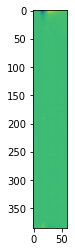

In [97]:
plt.(mean_wf)